In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()


Saving kaggle_survey_2017_2021.csv.zip to kaggle_survey_2017_2021.csv.zip


In [3]:
import os

os.rename("kaggle_survey_2017_2021.csv.zip", "kaggle_survey.zip")

In [4]:
!unzip kaggle_survey.zip

Archive:  kaggle_survey.zip
  inflating: kaggle_survey_2017_2021.csv  


In [5]:
import pandas as pd
df = pd.read_csv('kaggle_survey_2017_2021.csv', low_memory=False)
df.head()

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
4,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df.drop(columns=["-"])
df = df.dropna(thresh=5)

In [7]:
df_2021 = df[df["Time from Start to Finish (seconds)"].notnull()].copy()
print("2021 subset shape:", df_2021.shape)

2021 subset shape: (88304, 292)


In [8]:
df_2021 = df_2021.rename(columns={
    "Q1": "Age",
    "Q2": "Gender",
    "Q3": "Country",
    "Q4": "Education",
    "Q5": "Job_Title",
    "Q6": "Experience",
    "Q7_Part_1": "Python",
    "Q7_Part_2": "R",
    "Q7_Part_3": "SQL",
    "Q25": "Salary"
})

In [9]:
def map_salary_group(value):
    """Map messy salary strings into clean ranges."""
    if pd.isna(value):
        return "Other"
    val = str(value).replace("$", "").replace(",", "").replace(" ", "")

    if any(k in val for k in ["0-999", "0-10000", "1000-1999", "10000-14999"]):
        return "<15k"
    elif any(k in val for k in ["15000-19999", "20000-24999"]):
        return "15k–25k"
    elif any(k in val for k in ["25000-29999", "30000-39999"]):
        return "25k–40k"
    elif any(k in val for k in ["40000-49999", "50000-59999"]):
        return "40k–60k"
    elif any(k in val for k in ["60000-69999", "70000-79999", "80000-89999"]):
        return "60k–90k"
    elif any(k in val for k in ["90000-99999", "100000-124999"]):
        return "90k–125k"
    elif any(k in val for k in ["125000-149999", "150000-199999"]):
        return "125k–200k"
    elif any(k in val for k in ["200000-249999", "250000-299999", "300000-499999", "500000", "500000+", ">500000", ">1000000"]):
        return "200k+"
    else:
        return "Other"

In [10]:
df_2021 = df_2021[~df_2021["Salary"].isin([
    "I do not wish to disclose my approximate yearly compensation",
    "What is your current yearly compensation (approximate $USD)?"
])]

df_2021["Salary_Group"] = df_2021["Salary"].apply(map_salary_group)


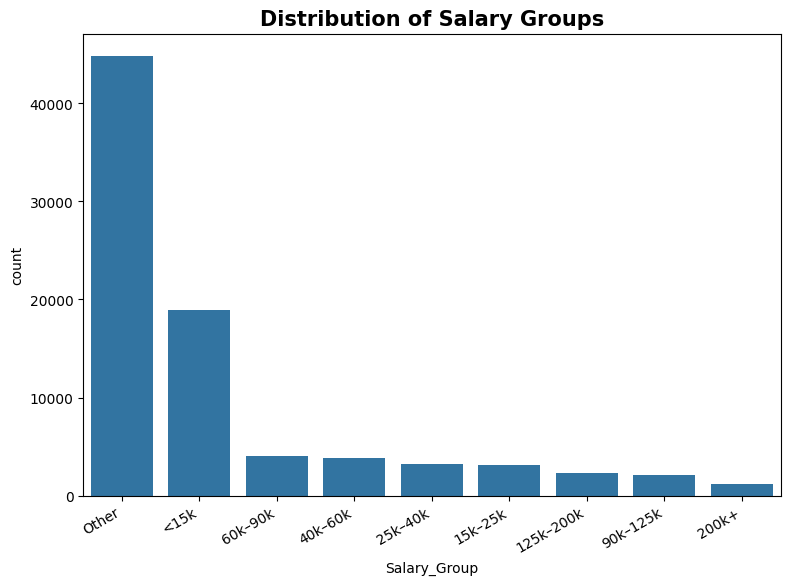

In [11]:
plt.figure(figsize=(9,6))
sns.countplot(
    data=df_2021,
    x="Salary_Group",
    order=df_2021["Salary_Group"].value_counts().index
)
plt.title("Distribution of Salary Groups", fontsize=15, weight="bold")
plt.xticks(rotation=30, ha="right")
plt.show()

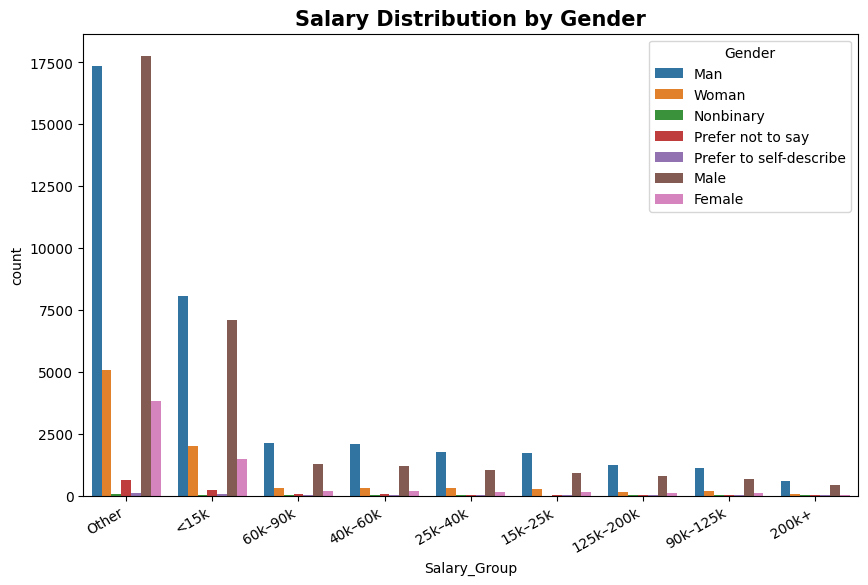

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(
    data=df_2021,
    x="Salary_Group",
    hue="Gender",
    order=df_2021["Salary_Group"].value_counts().index
)
plt.title("Salary Distribution by Gender", fontsize=15, weight="bold")
plt.xticks(rotation=30, ha="right")
plt.show()

/tmp/ipython-input-206578573.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


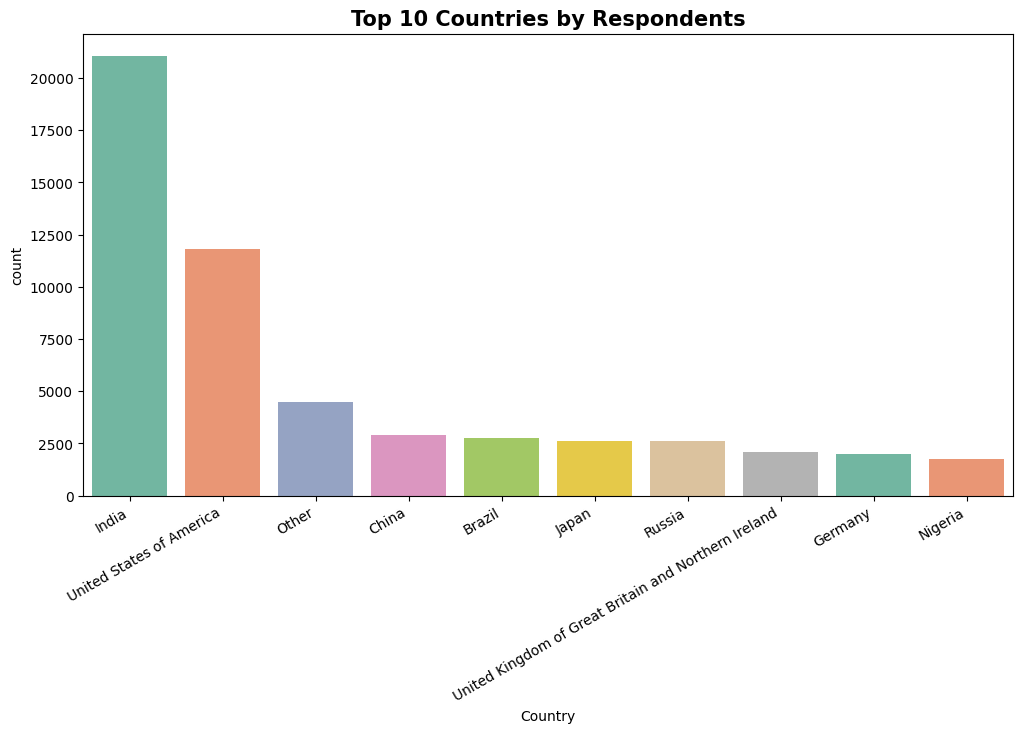

In [13]:
top_countries = df_2021["Country"].value_counts().nlargest(10).index
plt.figure(figsize=(12,6))
sns.countplot(
    data=df_2021[df_2021["Country"].isin(top_countries)],
    x="Country",
    order=top_countries,
    palette="Set2"
)
plt.title("Top 10 Countries by Respondents", fontsize=15, weight="bold")
plt.xticks(rotation=30, ha="right")
plt.show()

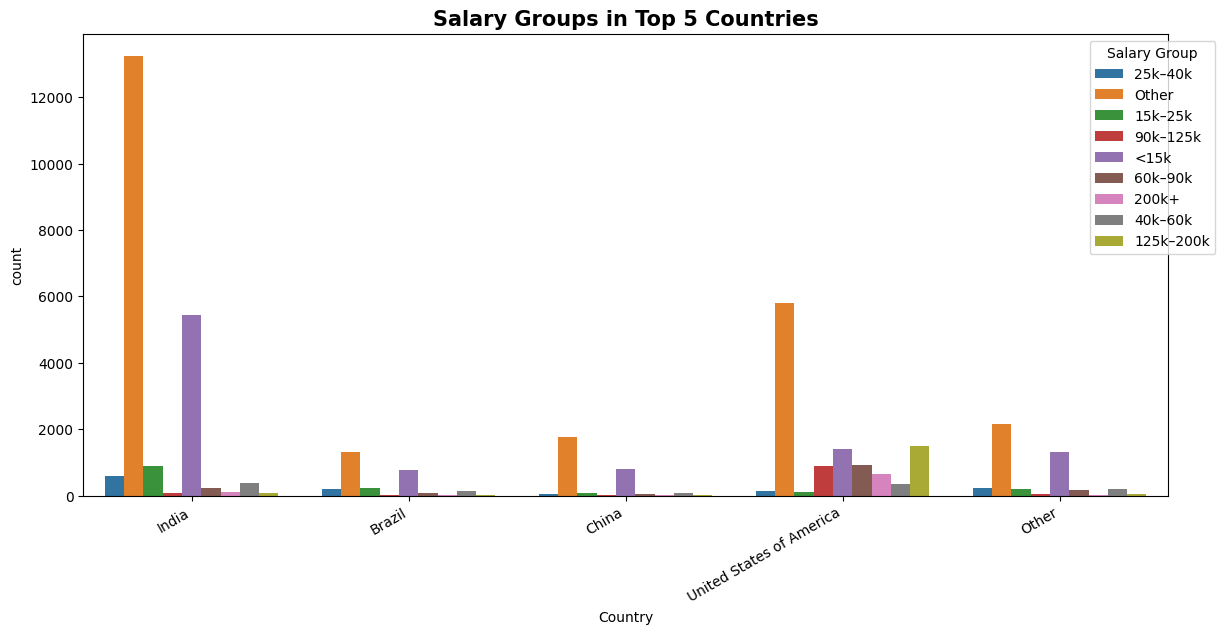

In [14]:
top5 = df_2021["Country"].value_counts().nlargest(5).index
plt.figure(figsize=(14,6))
sns.countplot(
    data=df_2021[df_2021["Country"].isin(top5)],
    x="Country",
    hue="Salary_Group"
)
plt.title("Salary Groups in Top 5 Countries", fontsize=15, weight="bold")
plt.xticks(rotation=30, ha="right")
plt.legend(title="Salary Group", bbox_to_anchor=(1.05,1))
plt.show()

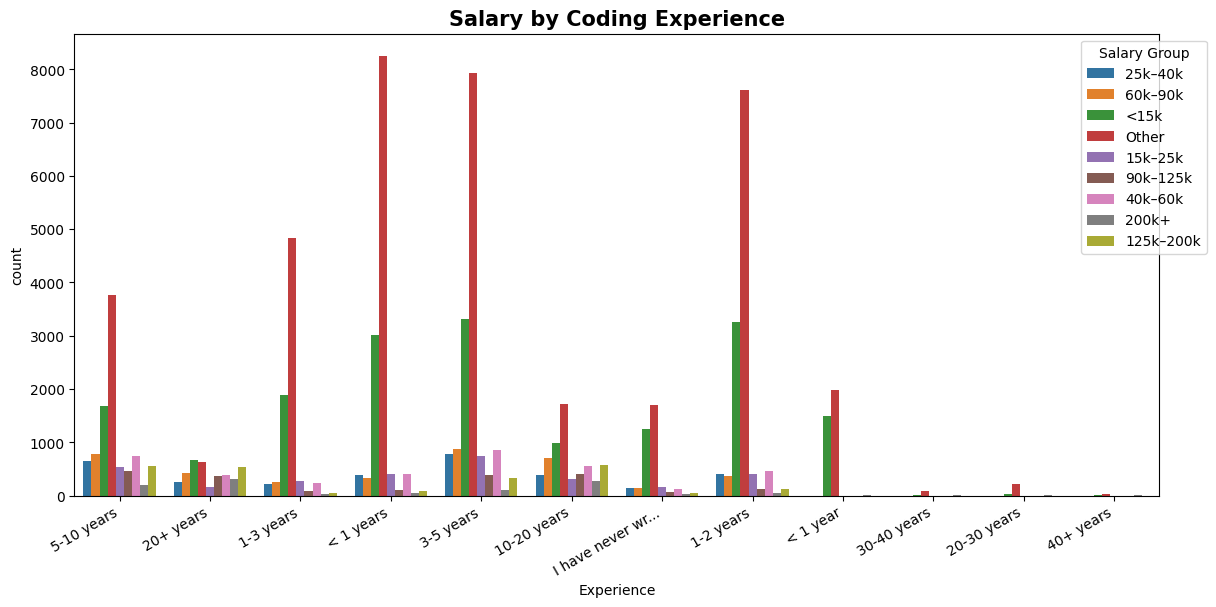

In [15]:
exp_df = df_2021.dropna(subset=["Experience", "Salary_Group"]).copy()
exp_df["Experience"] = exp_df["Experience"].apply(lambda x: x if len(x)<18 else x[:15]+"...")
plt.figure(figsize=(14,6))
sns.countplot(
    data=exp_df,
    x="Experience",
    hue="Salary_Group"
)
plt.title("Salary by Coding Experience", fontsize=15, weight="bold")
plt.xticks(rotation=30, ha="right")
plt.legend(title="Salary Group", bbox_to_anchor=(1.05,1))
plt.show()

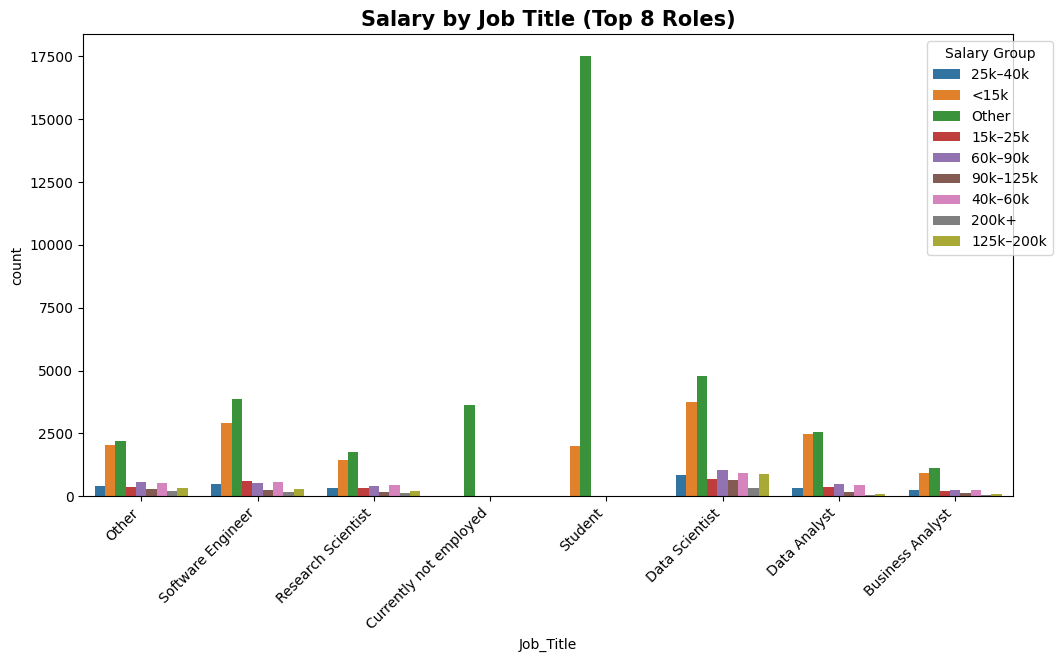

In [16]:
job_df = df_2021.dropna(subset=["Job_Title", "Salary_Group"])
top_jobs = job_df["Job_Title"].value_counts().nlargest(8).index
plt.figure(figsize=(12,6))
sns.countplot(
    data=job_df[job_df["Job_Title"].isin(top_jobs)],
    x="Job_Title",
    hue="Salary_Group"
)
plt.title("Salary by Job Title (Top 8 Roles)", fontsize=15, weight="bold")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Salary Group", bbox_to_anchor=(1.05,1))
plt.show()